<a href="https://colab.research.google.com/github/Shivam-98350/flower_image_identification/blob/main/flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos' , origin=dataset_url , cache_dir="." , untar=True)

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

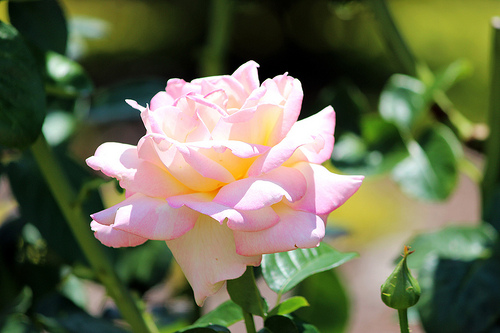

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[21]))

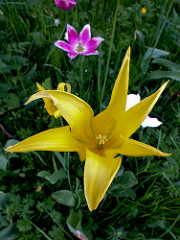

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[11]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/1446097778_97149b8362.jpg'

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [13]:
img.shape

(333, 500, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,y=[],[]

for flower_name , images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X=np.array(X)
y=np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes =5

model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

In [20]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 93s 1s/step - loss: 1.3155 - accuracy: 0.4517
Epoch 2/5
86/86 [==============================] - 90s 1s/step - loss: 1.0013 - accuracy: 0.6057
Epoch 3/5
86/86 [==============================] - 89s 1s/step - loss: 0.8237 - accuracy: 0.6788
Epoch 4/5
86/86 [==============================] - 90s 1s/step - loss: 0.5978 - accuracy: 0.7823
Epoch 5/5
86/86 [==============================] - 84s 976ms/step - loss: 0.3776 - accuracy: 0.8565


In [21]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 233ms/step - loss: 1.0567 - accuracy: 0.6394


[1.056685447692871, 0.6394335627555847]

## Data Agumentation

In [22]:
img_height,img_width=180,180
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal" ,
                                                input_shape=(img_height,
                                                              img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

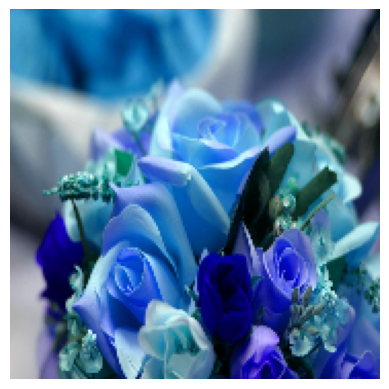

In [23]:
plt.axis('off')
plt.imshow(X[0])

In [24]:
from keras import backend as K
K.clear_session()

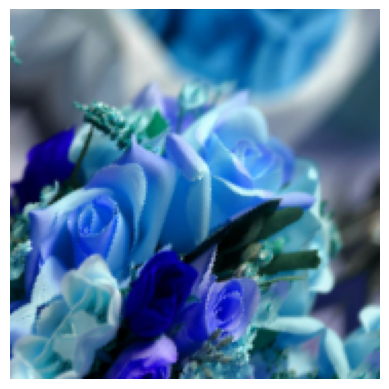

In [25]:
# can not use as it is taking too much resource
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 96s 1s/step - loss: 1.4569 - accuracy: 0.3943
Epoch 2/30
86/86 [==============================] - 97s 1s/step - loss: 1.1772 - accuracy: 0.5309
Epoch 3/30
86/86 [==============================] - 103s 1s/step - loss: 1.0692 - accuracy: 0.5767
Epoch 4/30
86/86 [==============================] - 104s 1s/step - loss: 0.9883 - accuracy: 0.6090
Epoch 5/30
86/86 [==============================] - 103s 1s/step - loss: 0.9474 - accuracy: 0.6261
Epoch 6/30
86/86 [==============================] - 107s 1s/step - loss: 0.8941 - accuracy: 0.6519
Epoch 7/30
86/86 [==============================] - 103s 1s/step - loss: 0.8613 - accuracy: 0.6602
Epoch 8/30
86/86 [==============================] - 103s 1s/step - loss: 0.8246 - accuracy: 0.6817
Epoch 9/30
86/86 [==============================] - 101s 1s/step - loss: 0.8212 - accuracy: 0.6842
Epoch 10/30
86/86 [==============================] - 103s 1s/step - loss: 0.7693 - accuracy: 0.6999
Epoch 11/30

In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 247ms/step - loss: 0.7009 - accuracy: 0.7407


[0.700861930847168, 0.7407407164573669]